## I. Background Analysis

In [155]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# Load the data
df = pd.read_csv('Hackathon round 3 with demos[48].csv')

# Quick exploration
print(f"Total responses: {len(df)}")
print(f"Columns: {len(df.columns)}")

# Find open-ended responses
oe_columns = [col for col in df.columns if '_OE' in col]
print(f"Open-ended questions: {len(oe_columns)}")

# Look at sentiment distribution
sentiment_cols = [col for col in df.columns if 'sentiment' in col and 'percentage' in col]
for col in sentiment_cols[:3]:
    print(f"\n{col}:")
    print(df[col].describe())

Total responses: 1001
Columns: 124
Open-ended questions: 48

Q2_Experience_with_AI_animal_other_OE_sentiment_percentage:
count    112.000000
mean       0.837954
std        0.187040
min        0.339674
25%        0.692079
50%        0.937590
75%        0.996153
max        0.999776
Name: Q2_Experience_with_AI_animal_other_OE_sentiment_percentage, dtype: float64

Q4A_Sector_AI_making_a_positive_impact_other_OE_sentiment_percentage:
count    81.000000
mean      0.879611
std       0.164659
min       0.458046
25%       0.769937
50%       0.984473
75%       0.995199
max       0.998966
Name: Q4A_Sector_AI_making_a_positive_impact_other_OE_sentiment_percentage, dtype: float64

Q4B_Sector_AI_making_a_negative_impact_other_OE_sentiment_percentage:
count    81.000000
mean      0.898728
std       0.132974
min       0.465820
25%       0.825016
50%       0.964309
75%       0.994571
max       0.999315
Name: Q4B_Sector_AI_making_a_negative_impact_other_OE_sentiment_percentage, dtype: float64


In [156]:
#!/usr/bin/env python3
"""
BC AI Survey Data Explorer - Hackathon Starter Script
=====================================================

A friendly introduction to the BC AI Survey dataset.
Perfect for getting started with data exploration!

Usage:
    python explore-data-starter.py

Requirements:
    pip install pandas

"""

import pandas as pd
import sys
from pathlib import Path

def explore_bc_ai_survey():
    """Explore the BC AI Survey data with helpful guidance"""
    
    # Find the data file
    data_file = "Hackathon round 3 with demos[48].csv"
    if not Path(data_file).exists():
        print(f"■ Data file not found: {data_file}")
        print("Make sure you're running this script from the repository root directory.")
        return
    
    print("■ BC AI Survey Data Explorer")
    print("=" * 50)
    
    try:
        # Load the data
        print("■ Loading survey data...")
        df = pd.read_csv(data_file)
        print(f"■ Loaded {len(df)} responses with {len(df.columns)} columns")
        print()
        
        # Basic overview
        print("■ Dataset Overview:")
        print(f"   • Total responses: {len(df):,}")
        print(f"   • Total columns: {len(df.columns):,}")
        print(f"   • Response rate: ~{len(df)} out of 1,001 target")
        print()
        
        # Find key column types
        oe_columns = [col for col in df.columns if '_OE' in col and 'sentiment' not in col]
        sentiment_columns = [col for col in df.columns if 'sentiment_percentage' in col]
        demo_columns = ['AgeRollup_Broad', 'Q1_Location_in_BC', 'Q1_Experience_with_AI']
        
        print("■ Column Categories:")
        print(f"   • Open-ended responses (_OE): {len(oe_columns)}")
        print(f"   • Sentiment scores: {len(sentiment_columns)}")
        print(f"   • Demographic fields: {len(demo_columns)}")
        print()
        
        # Demographics snapshot
        print("■ Demographics Snapshot:")
        if 'AgeRollup_Broad' in df.columns:
            age_dist = df['AgeRollup_Broad'].value_counts()
            for age, count in age_dist.items():
                pct = (count / len(df)) * 100
                print(f"   • {age}: {count} ({pct:.1f}%)")
        print()
        
        if 'Q1_Location_in_BC' in df.columns:
            print("■ Geographic Distribution:")
            location_dist = df['Q1_Location_in_BC'].value_counts().head(5)
            for location, count in location_dist.items():
                pct = (count / len(df)) * 100
                print(f"   • {location}: {count} ({pct:.1f}%)")
        print()
        
        # AI Experience levels
        if 'Q1_Experience_with_AI' in df.columns:
            print("■ AI Experience Levels:")
            exp_dist = df['Q1_Experience_with_AI'].value_counts()
            for exp, count in exp_dist.items():
                pct = (count / len(df)) * 100
                print(f"   • {exp}: {count} ({pct:.1f}%)")
        print()
        
        # Sample some interesting quotes
        print("■ Sample Quotes (Open-Ended Responses):")
        print("   (These are the storytelling goldmines!)")
        print()
        
        # Q17 Advice to leaders
        if 'Q17_Advice_BC_Leaders_text_OE' in df.columns:
            q17_responses = df['Q17_Advice_BC_Leaders_text_OE'].dropna()
            print("   ■ Advice to BC Leaders (Q17):")
            for i, response in enumerate(q17_responses.head(3)):
                if len(response.strip()) > 10:
                    preview = response[:80] + "..." if len(response) > 80 else response
                    print(f"      {i+1}. \"{preview}\"")
            print(f"      ... and {len(q17_responses)-3:,} more responses!")
            print()
        
        # Sentiment patterns
        print("■ Sentiment Patterns:")
        sample_sentiment_col = [col for col in sentiment_columns if 'Q17' in col]
        if sample_sentiment_col:
            col = sample_sentiment_col[0]
            sentiment_scores = pd.to_numeric(df[col], errors='coerce').dropna()
            avg_sentiment = sentiment_scores.mean()
            print(f"   • Average sentiment (Q17): {avg_sentiment:.2f} (0=negative, 1=positive)")
            
            # Find extreme sentiments
            very_negative = sentiment_scores[sentiment_scores < 0.1]
            very_positive = sentiment_scores[sentiment_scores > 0.9]
            print(f"   • Very negative responses (<0.1): {len(very_negative)}")
            print(f"   • Very positive responses (>0.9): {len(very_positive)}")
        print()
        
        # Next steps guidance
        print("■ Ready to Dive Deeper?")
        print()
        print("   ■ Hot Tips for Exploration:")
        print("   1. Focus on open-ended columns (*_OE) for authentic quotes")
        print("   2. Cross-reference sentiment with demographics")
        print("   3. Look for patterns in AI experience vs attitudes")
        print("   4. Hunt for geographic differences (Vancouver vs rural)")
        print("   5. Find the extreme voices (99%+ positive/negative sentiment)")
        print()
        
        print("   ■ Suggested Next Steps:")
        print("   • Load data: df = pd.read_csv('Hackathon round 3 with demos[48].csv')")
        print("   • Explore quotes: df['Q17_Advice_BC_Leaders_text_OE'].dropna()")
        print("   • Check sentiment: df['Q17_Advice_BC_Leaders_text_OE_sentiment_percentage']")
        print("   • Filter by demographics: df[df['AgeRollup_Broad'] == '18-34']")
        print("   • Find patterns: df.groupby('Q1_Experience_with_AI')['sentiment_col'].mean()")
        print()
        
        print("■ Happy Data Storytelling!")
        print("   Remember: Every row is a real British Columbian's voice.")
        print("   Your job is to help those voices be heard!")
        
    except Exception as e:
        print(f"■ Error loading data: {e}")
        print("Make sure pandas is installed: pip install pandas")

if __name__ == "__main__":
    explore_bc_ai_survey()

■ BC AI Survey Data Explorer
■ Loading survey data...
■ Loaded 1001 responses with 124 columns

■ Dataset Overview:
   • Total responses: 1,001
   • Total columns: 124
   • Response rate: ~1001 out of 1,001 target

■ Column Categories:
   • Open-ended responses (_OE): 16
   • Sentiment scores: 16
   • Demographic fields: 3

■ Demographics Snapshot:
   • 55 Plus: 423 (42.3%)
   • 35-54: 348 (34.8%)
   • 18-34: 230 (23.0%)

■ Geographic Distribution:
   • Vancouver / Lower Mainland: 767 (76.6%)
   • Victoria: 137 (13.7%)
   • Kelowna: 67 (6.7%)
   • Prince George: 30 (3.0%)

■ AI Experience Levels:
   • Occasional user – I’ve tried a few tools like ChatGPT or an AI art app.: 405 (40.5%)
   • Aware but not a user – I’ve heard about AI but haven’t used it myself.: 316 (31.6%)
   • Regular user – I use AI often for work or personal stuff.: 164 (16.4%)
   • No experience – I haven’t really used AI and don’t know much about it.: 106 (10.6%)
   • Expert/Developer – I work with or build AI tool

In [157]:
# Dataset Summary

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n")
display(df.describe())

Shape of dataset: (1001, 124)

Data Types:
 S. No                 int64
participant_id       object
distribution_type    object
distribution_name    object
engagement_id        object
                      ...  
KidsinHH_23          object
Unnamed: 120         object
Unnamed: 121         object
HH_Under18_23        object
Urban/ Rural         object
Length: 124, dtype: object

Missing Values:
 S. No                  0
participant_id         0
distribution_type      0
distribution_name      0
engagement_id          0
                    ... 
KidsinHH_23            0
Unnamed: 120         912
Unnamed: 121         987
HH_Under18_23          0
Urban/ Rural           0
Length: 124, dtype: int64

Statistical Summary:



,S. No,Overquota_redirect_ARF_return_token,DQ_redirect_not_in_BC_return_token,Q2_Experience_with_AI_animal_other_OE_sentiment_percentage,Q4A_Sector_AI_making_a_positive_impact_other_OE_sentiment_percentage,Q4B_Sector_AI_making_a_negative_impact_other_OE_sentiment_percentage,Q5_Art_vibe_AI_other_OE_sentiment_percentage,Q8_AI_helping_BC_community_video_OE_sentiment_percentage,Q8_AI_helping_BC_community_text_OE_sentiment_percentage,Q10_AI_superpower_to_help_community_other_OE_sentiment_percentage,...,Q13_AI_impact_worries_videos_OE_sentiment_percentage,Q13_AI_impact_worries_text_OE_sentiment_percentage,Q15_Matters_most_BC_AI_future_other_OE_sentiment_percentage,Q16_Indigenous_communities_involvement_AI_video_OE_sentiment_percentage,Q16_Indigenous_communities_involvement_AI_text_OE_sentiment_percentage,Q17_Advice_BC_Leaders_video_OE_sentiment_percentage,Q17_Advice_BC_Leaders_text_OE_sentiment_percentage,Completion_redirect_ARF_return_token,Age,Year of Birth
count,1001.000000,0.0,0.0,112.000000,81.000000,81.000000,168.000000,6.000000,993.000000,56.000000,...,7.000000,994.000000,36.000000,4.000000,997.000000,4.000000,997.000000,0.0,1001.000000,1001.000000
mean,501.000000,NaN,NaN,0.837954,0.879611,0.898728,0.852695,0.841996,0.768645,0.744739,...,0.798732,0.771188,0.812348,0.724761,0.759508,0.612788,0.713045,NaN,51.085914,1973.914086
std,289.108111,NaN,NaN,0.187040,0.164659,0.132974,0.155892,0.173807,0.184735,0.183666,...,0.186963,0.184973,0.191063,0.217453,0.175000,0.145350,0.182151,NaN,16.722757,16.722757
min,1.000000,NaN,NaN,0.339674,0.458046,0.465820,0.285353,0.614129,0.298340,0.385156,...,0.562953,0.315170,0.372664,0.430917,0.324086,0.427309,0.288424,NaN,18.000000,1932.000000
25%,251.000000,NaN,NaN,0.692079,0.769937,0.825016,0.742032,0.696450,0.606862,0.608659,...,0.624494,0.603543,0.702218,0.651132,0.597551,0.563792,0.560119,NaN,36.000000,1959.000000
50%,501.000000,NaN,NaN,0.937590,0.984473,0.964309,0.906325,0.915936,0.795906,0.743034,...,0.876179,0.815779,0.894390,0.758995,0.773335,0.621019,0.705587,NaN,50.000000,1975.000000
75%,751.000000,NaN,NaN,0.996153,0.995199,0.994571,0.983901,0.966646,0.944670,0.931497,...,0.958734,0.946188,0.980623,0.832624,0.927740,0.670016,0.877080,NaN,66.000000,1989.000000
max,1001.000000,NaN,NaN,0.999776,0.998966,0.999315,0.999512,0.999139,0.999719,0.994952,...,0.985535,0.999677,0.998870,0.950136,0.999142,0.781806,0.999290,NaN,93.000000,2007.000000


## Resuable functions

In [159]:
# Function to extract text before the dash (handles both '–' and '-')
def extract_short_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return text
    # Split on both types of dashes and take the first part
    result = text.split('–')[0].split('-')[0]  # Prioritize en-dash, then hyphen
    return result.strip()  # Remove extra whitespace


In [160]:
# Reusable function to create a pivot table
def create_pivot_table(df, row_col, col_col):
    """
    Create a pivot table from two categorical columns.
    
    Parameters:
    - df: DataFrame containing the data
    - row_col: Column name for rows (e.g., 'Q1_Experience_with_AI_Short')
    - col_col: Column name for columns (e.g., 'Q1_Location_in_BC')
    
    Returns:
    - dist: Pivot table with row_col as rows, col_col as columns, and Total column
    - row_cats: List of row categories
    - col_cats: List of column categories
    - total: Total responses
    - row_totals: Totals per row category
    - row_percentages: Percentages per row category
    - col_totals: Totals per column category
    - col_percentages: Percentages per column category
    """
    dist = df.groupby([row_col, col_col]).size().unstack(fill_value=0)
    row_cats = dist.index.tolist()
    col_cats = dist.columns.tolist()
    total = dist.sum().sum()
    col_totals = dist.sum()
    col_percentages = (col_totals / total * 100).round(1)
    row_totals = dist.sum(axis=1)
    row_percentages = (row_totals / total * 100).round(1)
    dist['Total'] = row_totals
    return dist, row_cats, col_cats, total, row_totals, row_percentages, col_totals, col_percentages

In [161]:
def print_distribution_table(dist, row_cats, col_cats, row_label, col_label, total, row_totals, row_percentages, col_totals, col_percentages, percentage_only=False):
    """
    Print a formatted distribution table and summary with counts and percentages or percentages only.
    
    Parameters:
    - dist: Pivot table DataFrame
    - row_cats: List of row categories
    - col_cats: List of column categories
    - row_label: Label for row categories (e.g., 'Age Group')
    - col_label: Label for column categories (e.g., 'Region')
    - total: Total responses
    - row_totals: Totals per row category
    - row_percentages: Percentages per row category
    - col_totals: Totals per column category
    - col_percentages: Percentages per column category
    - percentage_only: Boolean, True to show percentages only, False to show counts and percentages
    """
    print(f"\nDistribution: {row_label} by {col_label}")
    print("="*50)
    print(f"{row_label} by {col_label} ({'Average Percentage' if percentage_only else 'Count and Percentage'}):")
    # Header
    header = " " * 25  # Space for row labels
    for col in col_cats:
        if percentage_only:
            pct = col_percentages[col]
            header += f"{col}: ({pct:.1f}%)".ljust(25)
        else:
            count = col_totals[col]
            pct = col_percentages[col]
            header += f"{col}: {count} ({pct:.1f}%)".ljust(25)
    header += "Total".ljust(25)
    print(header)
    # Rows
    for row in row_cats:
        line = f"{row}:".ljust(25)
        for col in col_cats:
            count = dist.loc[row, col]
            col_total = col_totals[col]
            pct = (count / col_total * 100) if col_total > 0 else 0
            if percentage_only:
                line += f"({pct:.1f}%)".ljust(25)
            else:
                line += f"{count} ({pct:.1f}%)".ljust(25)
        # Add total column
        row_pct = row_percentages[row]
        if percentage_only:
            line += f"({row_pct:.1f}%)".ljust(25)
        else:
            row_total = row_totals[row]
            line += f"{row_total} ({row_pct:.1f}%)".ljust(25)
        print(line)
    # Summary
    print("\nOverall Summary:")
    print(f"- Total Responses: {total}")
    print(f"- Unique {col_label}: {col_cats}")
    print(f"- Unique {row_label} Levels: {row_cats}")

## II. Visualization

In [163]:
# Convert sentiment to numeric (if stored as string)
# sentiment_col = 'Q17_Advice_BC_Leaders_text_OE_sentiment_percentage'
# if sentiment_col in df.columns:
#     df[sentiment_col] = pd.to_numeric(df[sentiment_col], errors='coerce')

# Drop rows with missing
# df_plot = df.dropna(subset=[sentiment_col, 'Q1_Location_in_BC', age_col])
# df_plot = df.dropna(subset=[age_col, gender_col]) # Drop rows with missing Gender or Age

### 1. Age Group and Gender Distribution

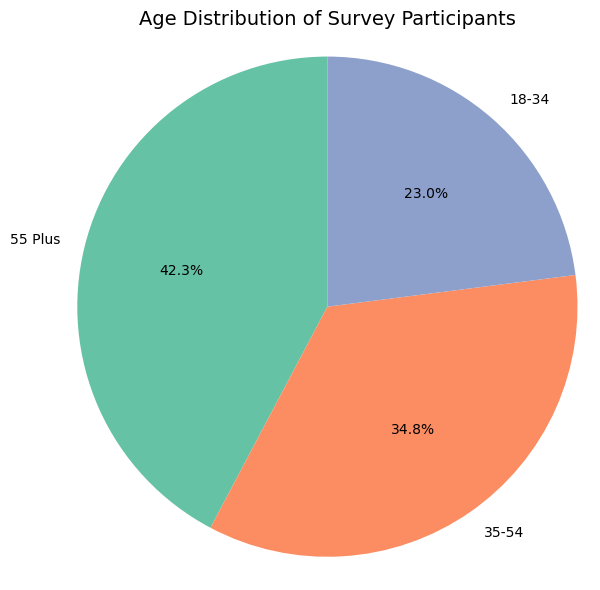

<Figure size 800x500 with 0 Axes>

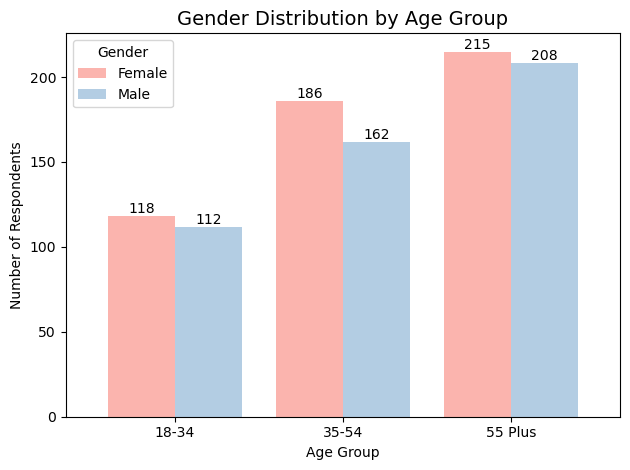


Distribution: Age Group by Gender
Age Group by Gender (Count and Percentage):
                         Female: 519 (51.8%)      Male: 482 (48.2%)        Total                    
18-34:                   118 (22.7%)              112 (23.2%)              230 (23.0%)              
35-54:                   186 (35.8%)              162 (33.6%)              348 (34.8%)              
55 Plus:                 215 (41.4%)              208 (43.2%)              423 (42.3%)              

Overall Summary:
- Total Responses: 1001
- Unique Gender: ['Female', 'Male']
- Unique Age Group Levels: ['18-34', '35-54', '55 Plus']
--------------------


In [165]:
# Check if required columns exist and have valid data
age_col = 'AgeRollup_Broad'
gender_col = 'Gender'

if age_col in df.columns and gender_col in df.columns and df[age_col].notna().any() and df[gender_col].notna().any():
    # Create pivot table
    dist, age_groups, genders, total, age_totals, age_percentages, gender_totals, gender_percentages = create_pivot_table(df, age_col, gender_col)

    age_dist = df[age_col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(age_dist.values, labels=age_dist.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=90)
    plt.title("Age Distribution of Survey Participants", fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Grouped Bar Chart
    plt.figure(figsize=(8, 5))
    dist.drop('Total', axis=1, errors='ignore').plot(kind='bar', color=sns.color_palette("Pastel1", len(genders)), width=0.8)

    plt.title("Gender Distribution by Age Group", fontsize=14)
    plt.xlabel("Age Group")
    plt.ylabel("Number of Respondents")
    plt.xticks(rotation=0)
    plt.legend(title="Gender")
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%d', size=10)
    plt.tight_layout()
    plt.show()
    
    # Print table and summary
    print_distribution_table(
        dist=dist,
        row_cats=age_groups,
        col_cats=genders,
        row_label="Age Group",
        col_label="Gender",
        total=total,
        row_totals=age_totals,
        row_percentages=age_percentages,
        col_totals=gender_totals,
        col_percentages=gender_percentages
    )
else:
    print("■ Missing or invalid data in 'AgeRollup_Broad' or 'Gender' columns.")
    if gender_col in df.columns:
        print(f"Available genders: {df[gender_col].dropna().unique().tolist()}")
    if age_col in df.columns:
        print(f"Available age groups: {df[age_col].dropna().unique().tolist()}")
print("--------------------")

**Observation:**
1. Older Adults (55+) – 42.3%

This is the largest demographic group in the survey sample. Their strong representation suggests:

* High levels of concern or interest in the societal impacts of AI
* Potential focus on ethics, transparency, privacy, and job displacement
* A possibly more cautious or skeptical view of AI adoption

2. Middle-Aged Adults (35–54) – 34.8%

This group also forms a significant portion of the sample and likely represents:

* Working professionals who engage with AI in the workplace
* Interests around productivity, access, and upskilling
* A practical viewpoint on both the opportunities and risks of AI

3. Young Adults (18–34) – 23.0%

Despite being the most active users of AI tools (e.g., ChatGPT, Midjourney, GitHub Copilot), this group is the least represented:

* Their perspectives on innovation, experimentation, and tech optimism may be underrepresented
* Indicates a potential engagement gap or lack of awareness about policy conversations around AI
* This could be a limitation if aiming for a generationally balanced perspective

### 2. AI Usage by Age Group Distribution

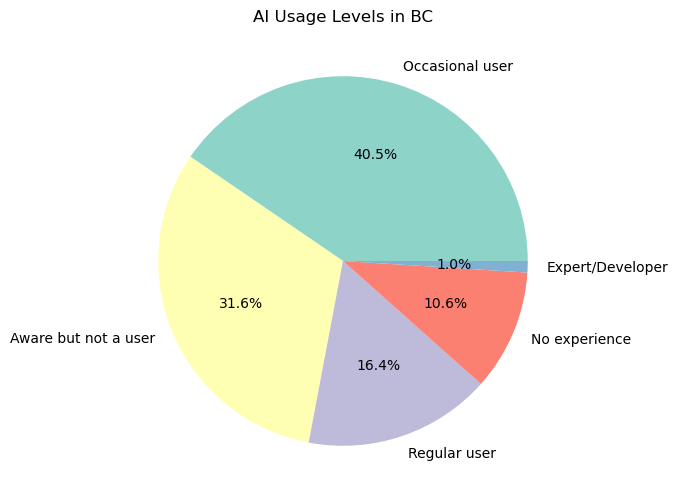

<Figure size 1600x1000 with 0 Axes>

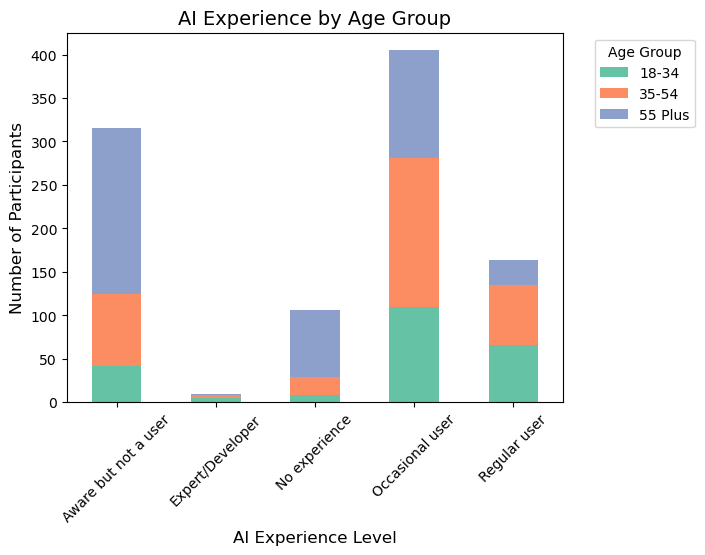


Distribution: AI Experience by Age Group
AI Experience by Age Group (Count and Percentage):
                         18-34: 230 (23.0%)       35-54: 348 (34.8%)       55 Plus: 423 (42.3%)     Total                    
Aware but not a user:    42 (18.3%)               83 (23.9%)               191 (45.2%)              316 (31.6%)              
Expert/Developer:        5 (2.2%)                 3 (0.9%)                 2 (0.5%)                 10 (1.0%)                
No experience:           8 (3.5%)                 21 (6.0%)                77 (18.2%)               106 (10.6%)              
Occasional user:         109 (47.4%)              172 (49.4%)              124 (29.3%)              405 (40.5%)              
Regular user:            66 (28.7%)               69 (19.8%)               29 (6.9%)                164 (16.4%)              

Overall Summary:
- Total Responses: 1001
- Unique Age Group: ['18-34', '35-54', '55 Plus']
- Unique AI Experience Levels: ['Aware but not a user', 'Ex

In [168]:
# Apply to create a new column
df['Q1_Experience_with_AI_Short'] = df['Q1_Experience_with_AI'].apply(extract_short_text)

# Check if required columns exist and have valid data
age_col = 'AgeRollup_Broad'
exp_col = 'Q1_Experience_with_AI_Short'

if age_col in df.columns and exp_col in df.columns and df[age_col].notna().any() and df[exp_col].notna().any():
    # Create pivot table
    dist, exp_levels, age_groups, total, exp_totals, exp_percentages, age_totals, age_percentages = create_pivot_table(df, exp_col, age_col)

    usage_dist = df[exp_col].value_counts()
    if usage_dist.empty:
        print("■ No data found in 'Q1_Experience_with_AI_short' column.")
        raise ValueError("Empty 'Q1_Experience_with_AI_short' column")
    plt.figure(figsize=(6, 6))
    plt.pie(usage_dist.values, labels=usage_dist.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
    plt.title("AI Usage Levels in BC")
    plt.show()

    # Create a stacked bar chart
    plt.figure(figsize=(16, 10))
    dist.drop('Total', axis=1, errors='ignore').plot(kind='bar', stacked=True, color=sns.color_palette("Set2", len(age_groups)))
    
    # Customize the plot
    plt.title("AI Experience by Age Group", fontsize=14)
    plt.xlabel("AI Experience Level", fontsize=12)
    plt.ylabel("Number of Participants", fontsize=12)
    plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()
    
    # Print table and summary
    print_distribution_table(
        dist=dist,
        row_cats=exp_levels,
        col_cats=age_groups,
        row_label="AI Experience",
        col_label="Age Group",
        total=total,
        row_totals=exp_totals,
        row_percentages=exp_percentages,
        col_totals=age_totals,
        col_percentages=age_percentages
    )
else:
    print("■ Missing or invalid data in 'AgeRollup_Broad' or 'Q1_Experience_with_AI_Short' columns.")
    if exp_col in df.columns:
        print(f"Available experience levels: {df[exp_col].dropna().unique().tolist()}")
    if age_col in df.columns:
        print(f"Available age groups: {df[age_col].dropna().unique().tolist()}")
print("--------------------")


1. High Awareness, Low Expertise:

Over 72% of respondents have at least tried AI or are aware of it, showing that AI has reached public consciousness.

2. Passive vs. Active Engagement:

While 40.5% have tried AI casually, only 16.4% use it regularly. This gap signals interest but also potential barriers to frequent usage (e.g. lack of training, trust, or use cases).

3. Very Few Experts:

Only 1% are actual developers or builders of AI tools, suggesting a low technical fluency in the general population.

4. Education Opportunities:

The 10.6% with no experience and 31.6% with only awareness form a key demographic for AI literacy programs.

**Observation:**

There is no strong gender skew, which supports the survey’s credibility in reflecting both male and female perspectives on AI across age groups.

Slightly higher female participation may offer richer insights into concerns around ethics, care, and community impact, depending on the themes explored in the open-ended responses.

Gender-balanced feedback enables more inclusive AI policy and design recommendations.

### 3. Age Group by AI Effect on Society Feeling Distribution

<Figure size 1600x1000 with 0 Axes>

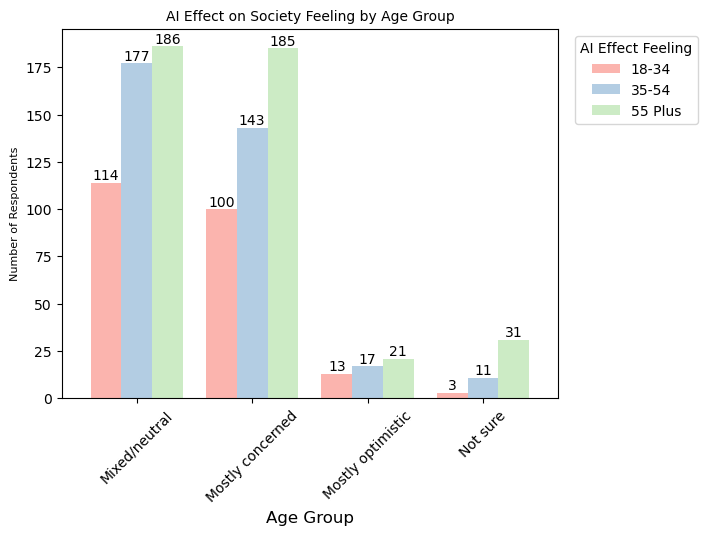


Distribution: AI Effect Feeling by Age Group
AI Effect Feeling by Age Group (Count and Percentage):
                         18-34: 230 (23.0%)       35-54: 348 (34.8%)       55 Plus: 423 (42.3%)     Total                    
Mixed/neutral:           114 (49.6%)              177 (50.9%)              186 (44.0%)              477 (47.7%)              
Mostly concerned:        100 (43.5%)              143 (41.1%)              185 (43.7%)              428 (42.8%)              
Mostly optimistic:       13 (5.7%)                17 (4.9%)                21 (5.0%)                51 (5.1%)                
Not sure:                3 (1.3%)                 11 (3.2%)                31 (7.3%)                45 (4.5%)                

Overall Summary:
- Total Responses: 1001
- Unique Age Group: ['18-34', '35-54', '55 Plus']
- Unique AI Effect Feeling Levels: ['Mixed/neutral', 'Mostly concerned', 'Mostly optimistic', 'Not sure']
--------------------


In [172]:
# Apply to create a new column
df['Q3_AI_affecting_society_short'] = df['Q3_AI_affecting_society_feeling'].apply(extract_short_text)

# Check if required columns exist and have valid data
age_col = 'AgeRollup_Broad'
feeling_col = 'Q3_AI_affecting_society_short'

if age_col in df.columns and feeling_col in df.columns and df[age_col].notna().any() and df[feeling_col].notna().any():
    # Create pivot table
    dist, feelings, age_groups, total, feeling_totals, feeling_percentages, age_totals, age_percentages = create_pivot_table(df, feeling_col, age_col)
    
    # Create a bar chart, excluding Total column
    plt.figure(figsize=(16, 10))
    dist.drop('Total', axis=1, errors='ignore').plot(kind='bar', color=sns.color_palette("Pastel1", len(feelings)), width=0.8)
    
    # Customize the plot
    plt.title("AI Effect on Society Feeling by Age Group", fontsize=10)
    plt.xlabel("Age Group", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=8)
    plt.xticks(rotation=45)
    plt.legend(labels=age_groups, title="AI Effect Feeling", bbox_to_anchor=(1.02, 1), loc='upper left')
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%d', size=10)
    plt.show()
    
    # Print table and summary
    print_distribution_table(
        dist=dist,
        row_cats=feelings,
        col_cats=age_groups,
        row_label="AI Effect Feeling",
        col_label="Age Group",
        total=total,
        row_totals=feeling_totals,
        row_percentages=feeling_percentages,
        col_totals=age_totals,
        col_percentages=age_percentages
    )
else:
    print("■ Missing or invalid data in 'AgeRollup_Broad' or 'Q3_AI_affecting_society_short' columns.")
    if feeling_col in df.columns:
        print(f"Available feelings: {df[feeling_col].dropna().unique().tolist()}")
    if age_col in df.columns:
        print(f"Available age groups: {df[age_col].dropna().unique().tolist()}")
print("--------------------")

### 4. AI Usage by Geographic Distribution

<Figure size 1600x1000 with 0 Axes>

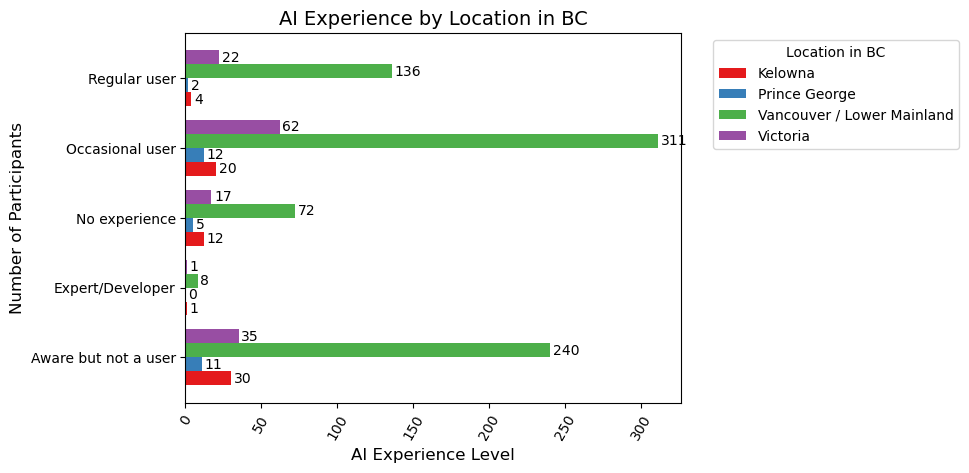


Distribution: AI Experience by Location in BC
AI Experience by Location in BC (Count and Percentage):
                         Kelowna: 67 (6.7%)       Prince George: 30 (3.0%) Vancouver / Lower Mainland: 767 (76.6%)Victoria: 137 (13.7%)    Total                    
Aware but not a user:    30 (44.8%)               11 (36.7%)               240 (31.3%)              35 (25.5%)               316 (31.6%)              
Expert/Developer:        1 (1.5%)                 0 (0.0%)                 8 (1.0%)                 1 (0.7%)                 10 (1.0%)                
No experience:           12 (17.9%)               5 (16.7%)                72 (9.4%)                17 (12.4%)               106 (10.6%)              
Occasional user:         20 (29.9%)               12 (40.0%)               311 (40.5%)              62 (45.3%)               405 (40.5%)              
Regular user:            4 (6.0%)                 2 (6.7%)                 136 (17.7%)              22 (16.1%)               164

In [174]:
# Check if required columns exist and have valid data
loc_col = 'Q1_Location_in_BC'
exp_col = 'Q1_Experience_with_AI_Short'

if loc_col in df.columns and exp_col in df.columns and df[loc_col].notna().any() and df[exp_col].notna().any():
    # Create pivot table
    dist, exp_levels, locations, total, exp_totals, exp_percentages, loc_totals, loc_percentages = create_pivot_table(df, exp_col, loc_col)
    
    # Create a stacked bar chart, excluding Total column
    plt.figure(figsize=(16, 10))
    dist.drop('Total', axis=1, errors='ignore').plot(kind='barh', color=sns.color_palette("Set1", len(locations)), width=0.8)
    
    # Customize the plot
    
    plt.title("AI Experience by Location in BC", fontsize=14)
    plt.xlabel("AI Experience Level", fontsize=12)
    plt.ylabel("Number of Participants", fontsize=12)
    plt.xticks(rotation=60)
    plt.legend(labels=locations, title="Location in BC", bbox_to_anchor=(1.05, 1), loc='upper left')
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%d', size=10, padding=2)
    plt.show()
    
    # Print table and summary
    print_distribution_table(
        dist=dist,
        row_cats=exp_levels,
        col_cats=locations,
        row_label="AI Experience",
        col_label="Location in BC",
        total=total,
        row_totals=exp_totals,
        row_percentages=exp_percentages,
        col_totals=loc_totals,
        col_percentages=loc_percentages
    )
else:
    print("■ Missing or invalid data in 'Q1_Location_in_BC' or 'Q1_Experience_with_AI_Short' columns.")
    if exp_col in df.columns:
        print(f"Available experience levels: {df[exp_col].dropna().unique().tolist()}")
    if loc_col in df.columns:
        print(f"Available locations: {df[loc_col].dropna().unique().tolist()}")
print("--------------------")

### 5. Sentiment by Region and Age

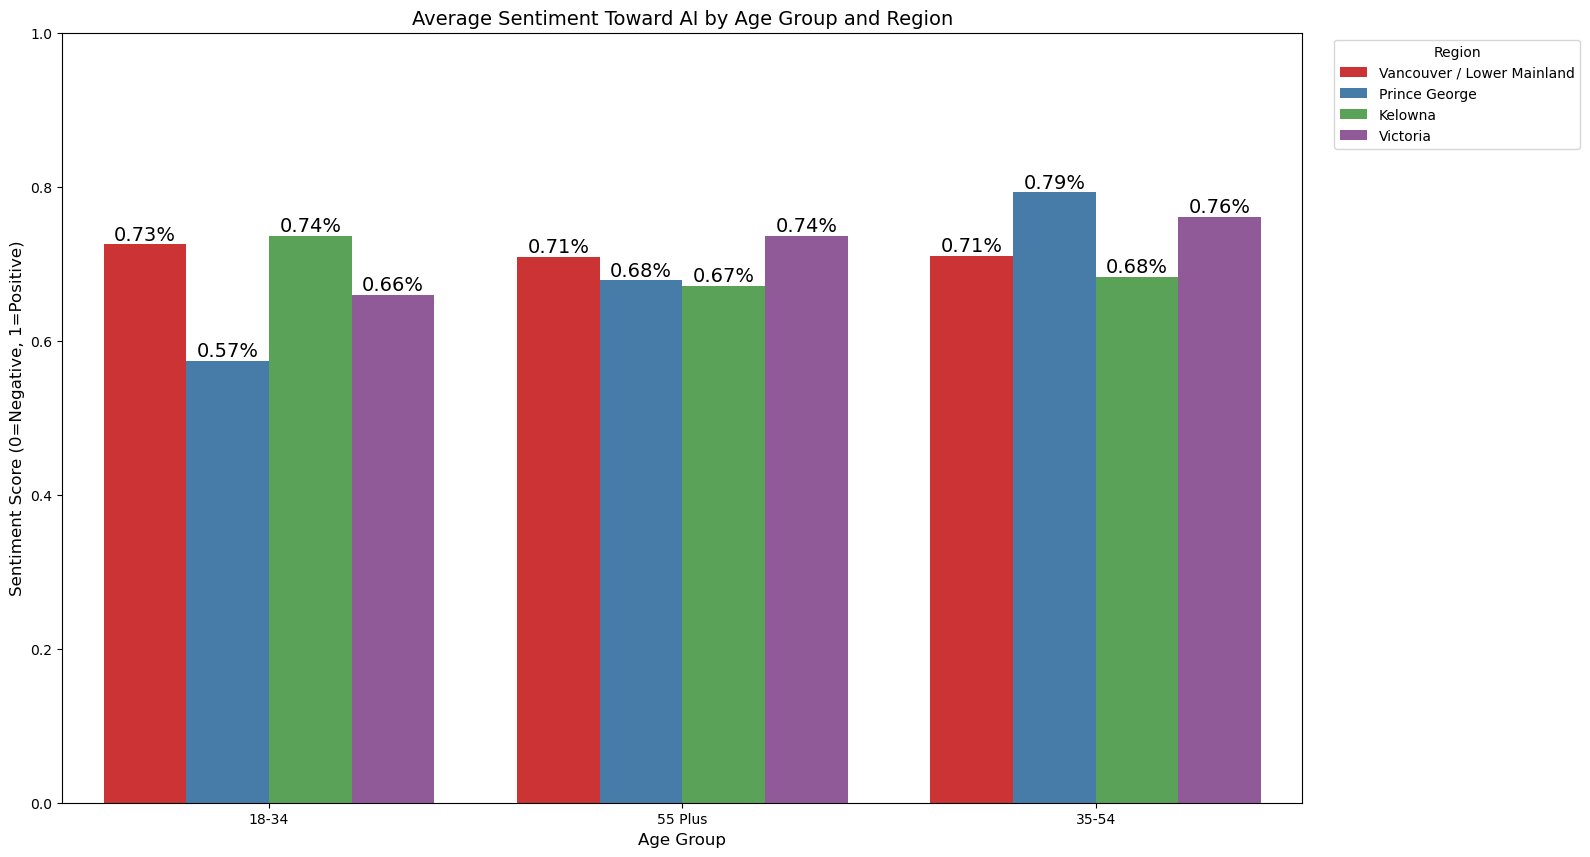

--------------------


In [176]:
# Check if required columns exist and have valid data
age_col = 'AgeRollup_Broad'
loc_col = 'Q1_Location_in_BC'
sentiment_col = 'Q17_Advice_BC_Leaders_text_OE_sentiment_percentage'

if age_col in df.columns and loc_col in df.columns and sentiment_col in df.columns and df[age_col].notna().any() and df[loc_col].notna().any() and df[sentiment_col].notna().any():
    # Create pivot table for distribution
    dist, age_groups, locations, total, age_totals, age_percentages, loc_totals, loc_percentages = create_pivot_table(df, age_col, loc_col)
    
    # Calculate overall mean and means by age and region
    # overall_sentiment_mean = df[sentiment_col].mean()
    # age_sentiment_means = df.groupby(age_col)[sentiment_col].mean()
    # loc_sentiment_means = df.groupby(loc_col)[sentiment_col].mean()
    # age_sentiment = df.groupby(age_col)[sentiment_col].sum()
    # loc_sentiment = df.groupby(loc_col)[sentiment_col].sum()
    # combined_sentiment_means = df.groupby([age_col, loc_col])[sentiment_col].mean().unstack(fill_value=0)
    
    plt.figure(figsize=(16, 10))
    sns.barplot(
        data=df,
        x=age_col,
        y=sentiment_col,
        hue='Q1_Location_in_BC',
        palette='Set1',
        errorbar=None
    )
    plt.title('Average Sentiment Toward AI by Age Group and Region', fontsize=14)
    plt.ylabel('Sentiment Score (0=Negative, 1=Positive)', fontsize=12)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%1.2f%%', size=14)
    plt.show()
    
    # # Print distribution table and summary
    # print_distribution_table(
    #     dist=dist,
    #     row_cats=age_groups,
    #     col_cats=locations,
    #     row_label="Age Group",
    #     col_label="Region",
    #     total=combined_sentiment_means,
    #     row_totals=age_sentiment,
    #     row_percentages=age_sentiment_means,
    #     col_totals=loc_sentiment,
    #     col_percentages=loc_sentiment_means,
    #     percentage_only=True
    # )
else:
    print("■ Missing or invalid data in 'AgeRollup_Broad', 'Q1_Location_in_BC', or 'sentiment_col' columns.")
    if age_col in df.columns:
        print(f"Available age groups: {df[age_col].dropna().unique().tolist()}")
    if loc_col in df.columns:
        print(f"Available locations: {df[loc_col].dropna().unique().tolist()}")
    if sentiment_col in df.columns:
        print(f"Available sentiment values: {df[sentiment_col].dropna().unique().tolist()}")
print("--------------------")

1. General Trend:

Overall sentiment scores toward AI are positive to moderately positive across age groups and regions.
Most averages fall between 0.66 and 0.79 (on a scale of 0 = negative, 1 = positive).

2. By Region:

Victoria shows the highest consistent sentiment across all age groups, indicating more optimism or comfort with AI.
Prince George is the most polarized, with younger participants being more skeptical (lowest sentiment), but older ones more favorable.

3. By Age Group:

Sentiment does not drop significantly with age—surprisingly, older age groups often show equal or higher sentiment than younger ones.
This challenges the common belief that older people are more resistant to new technologies.

### 6. Sociatal Impact Feelings

/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/4072922471.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=societal_dist.index, y=societal_dist.values, palette="Greens_d")


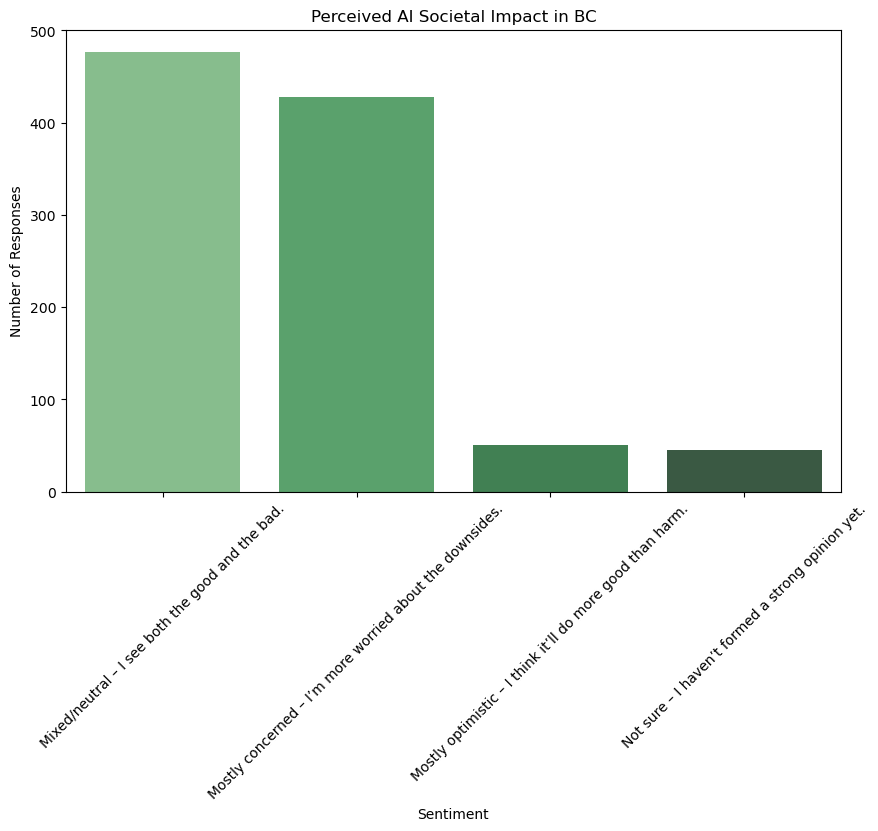


■ Societal Impact Distribution: {'Mixed/neutral – I see both the good and the bad.': 477, 'Mostly concerned – I’m more worried about the downsides.': 428, 'Mostly optimistic – I think it’ll do more good than harm.': 51, 'Not sure – I haven’t formed a strong opinion yet.': 45}


In [179]:
societal_dist = df['Q3_AI_affecting_society_feeling'].value_counts()
if societal_dist.empty:
    print("■ No data found in 'Q3_AI_affecting_society_feeling' column.")
    raise ValueError("Empty 'Q3_AI_affecting_society_feeling' column")
plt.figure(figsize=(10, 6))
sns.barplot(x=societal_dist.index, y=societal_dist.values, palette="Greens_d")
plt.title("Perceived AI Societal Impact in BC")
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45)
# plt.savefig("societal_impact_bar.png", bbox_inches='tight')
plt.show()
print()
print(f"■ Societal Impact Distribution: {societal_dist.to_dict()}")

**Observation:**

While most British Columbians recognize that AI is transformational, there's a strong undercurrent of concern and caution. The data suggests that efforts to build public trust, ensure ethical development, and communicate tangible benefits will be critical in gaining broader support for AI initiatives across the province.

### 7. Job Impact Distribution

/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/1364983819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_dist.index, y=job_dist.values, palette="Reds_d")


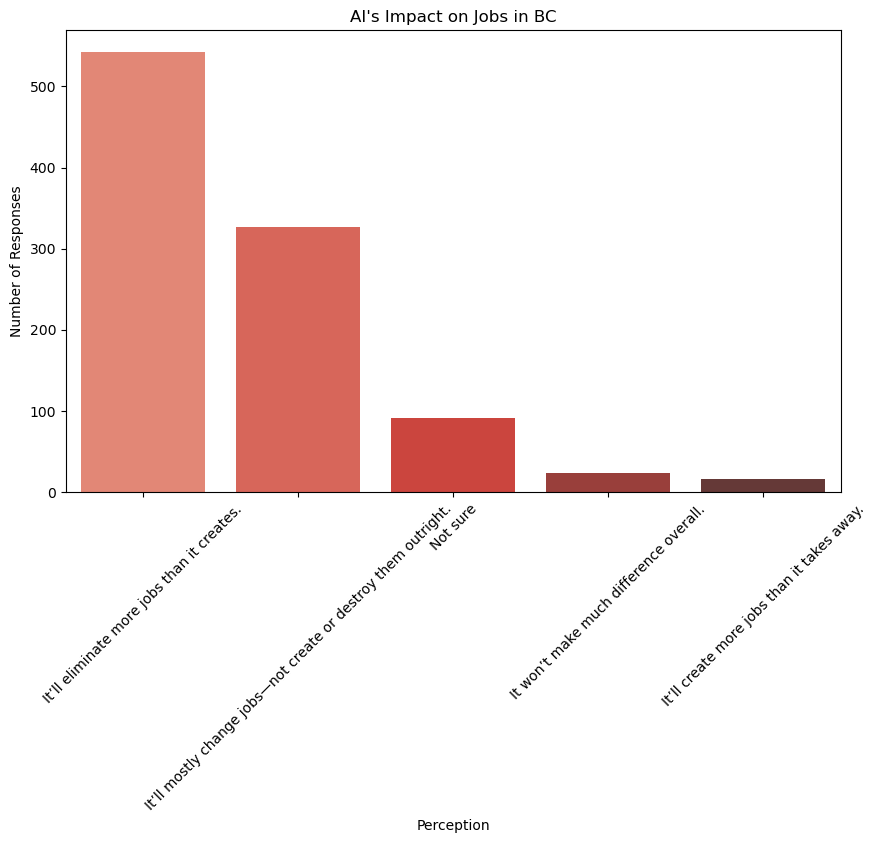


■ Job Impact Distribution: {'It’ll eliminate more jobs than it creates.': 542, 'It’ll mostly change jobs—not create or destroy them outright.': 327, 'Not sure': 91, 'It won’t make much difference overall.': 24, 'It’ll create more jobs than it takes away.': 17}


In [182]:
job_dist = df['Q9_Jobs_in_BC_AI_Influence'].value_counts()
if job_dist.empty:
    print("■ No data found in 'Q9_Jobs_in_BC_AI_Influence' column.")
    raise ValueError("Empty 'Q9_Jobs_in_BC_AI_Influence' column")
plt.figure(figsize=(10, 6))
sns.barplot(x=job_dist.index, y=job_dist.values, palette="Reds_d")
plt.title("AI's Impact on Jobs in BC")
plt.xlabel("Perception")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45)
# plt.savefig("job_impact_bar.png", bbox_inches='tight')
plt.show()
print()
print(f"■ Job Impact Distribution: {job_dist.to_dict()}")

**Observations:**

British Columbians are highly cautious about AI’s impact on the workforce. While a notable segment is hopeful about evolving roles, the dominant narrative is one of job threat. This highlights the importance of:

Policy support for reskilling/upskilling

Transparent communication from businesses and government

Encouraging AI solutions that augment, not replace, human work

/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/2511208686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(concern_counts.keys()), y=list(concern_counts.values()), palette="Reds_r")


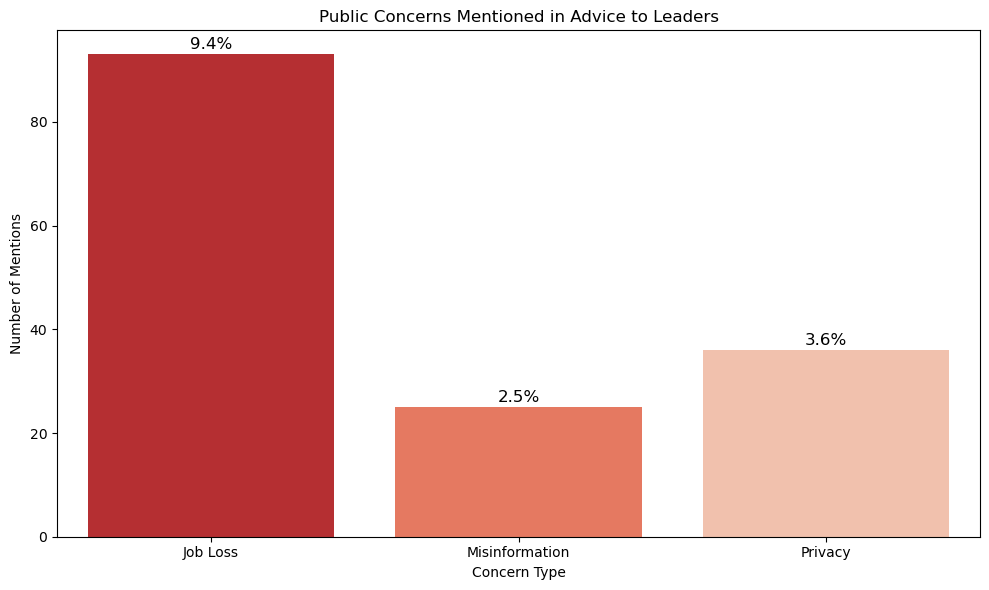

In [184]:
# Concern Themes – Job Loss vs. Misinformation vs. Privacy
# Extract concern themes from advice text
advice_col = 'Q17_Advice_BC_Leaders_text_OE'
if advice_col in df.columns:
    df['job_loss_mention'] = df[advice_col].str.contains(r'job|jobs|unemployment|work|career', case=False, na=False)
    df['misinformation_mention'] = df[advice_col].str.contains(r'fake|misinfo|deepfake|lie|disinfo', case=False, na=False)
    df['privacy_mention'] = df[advice_col].str.contains(r'privacy|data|surveillance|track', case=False, na=False)
else:
    print("Advice column not found.")
# Count mentions
concern_counts = {
    'Job Loss': df['job_loss_mention'].sum(),
    'Misinformation': df['misinformation_mention'].sum(),
    'Privacy': df['privacy_mention'].sum()
}

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(concern_counts.keys()), y=list(concern_counts.values()), palette="Reds_r")

# Add percentages
total_advice = df[advice_col].dropna().shape[0]
for idx, (label, count) in enumerate(concern_counts.items()):
    pct = (count / total_advice) * 100
    plt.text(idx, count + 1, f"{pct:.1f}%", ha='center', fontsize=12)

plt.title("Public Concerns Mentioned in Advice to Leaders")
plt.ylabel("Number of Mentions")
plt.xlabel("Concern Type")
plt.tight_layout()
plt.show()

## Sentiment Analysis for Open-ended Questions

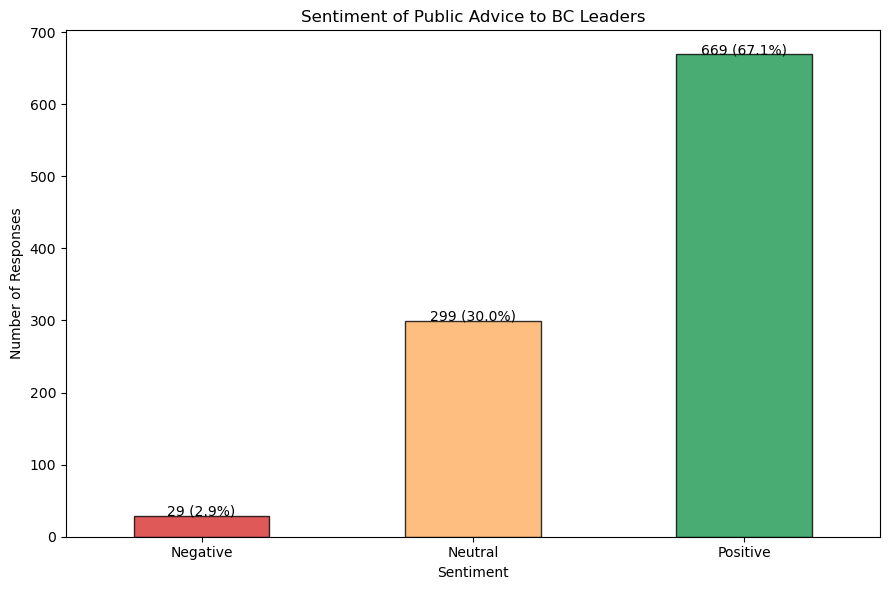

In [186]:
# Sentiment Distribution (Negative, Neutral, Positive)
# Define sentiment group (from sentiment percentage)
sentiment_col = 'Q17_Advice_BC_Leaders_text_OE_sentiment_percentage'
if sentiment_col in df.columns:
    df[sentiment_col] = pd.to_numeric(df[sentiment_col], errors='coerce')

    # Categorize sentiment
    df['Sentiment_Category'] = pd.cut(
        df[sentiment_col],
        bins=[0, 0.4, 0.6, 1.0],
        labels=['Negative', 'Neutral', 'Positive']
    )
else:
    print("Sentiment column not found.")
    
sentiment_counts = df['Sentiment_Category'].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

colors = ['#d73030', '#fdae61', '#1a9850']
plt.figure(figsize=(9, 6))
bars = sentiment_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)

plt.title("Sentiment of Public Advice to BC Leaders")
plt.ylabel("Number of Responses")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)

# Add count and percentage
total_sentiment = sentiment_counts.sum()
for idx, count in enumerate(sentiment_counts):
    pct = (count / total_sentiment) * 100
    plt.text(idx, count + 0.5, f"{count} ({pct:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

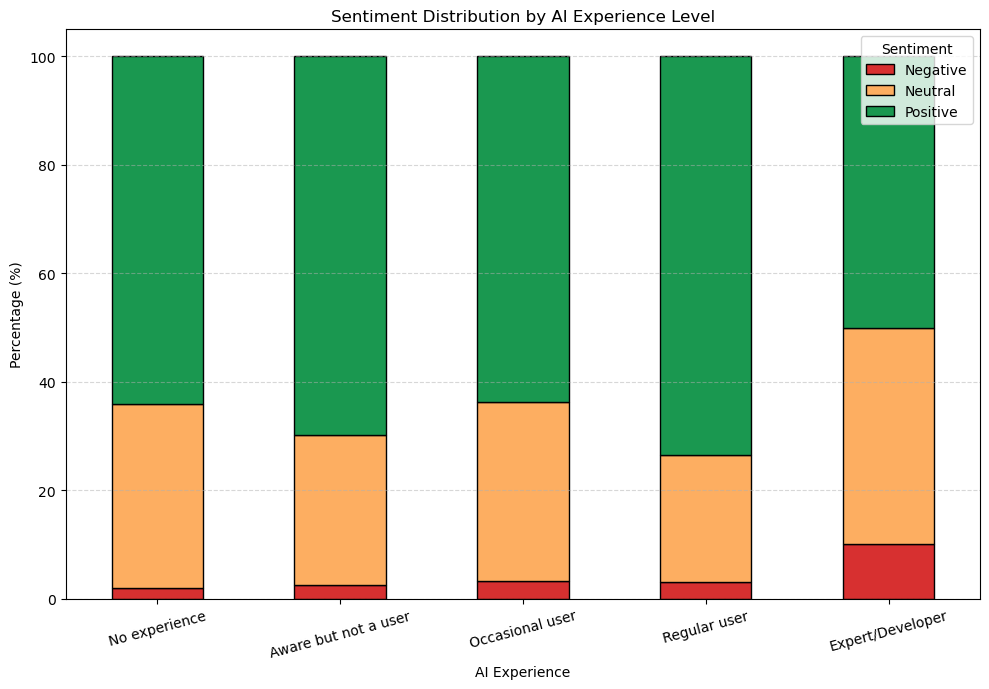

In [187]:
# Sentiment by AI Experience (Non-Users Are More Negative)
# Cross-tab: Sentiment Category by Experience
ct = pd.crosstab(df['Q1_Experience_with_AI_Short'], df['Sentiment_Category'], normalize='index') * 100

# Reorder for clarity
exp_order = ['No experience', 'Aware but not a user', 'Occasional user', 'Regular user', 'Expert/Developer']
ct = ct.reindex(exp_order).fillna(0)

# Plot
ct.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#d73030', '#fdae61', '#1a9850'], edgecolor='black')
plt.title("Sentiment Distribution by AI Experience Level")
plt.xlabel("AI Experience")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=15)
plt.legend(title="Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

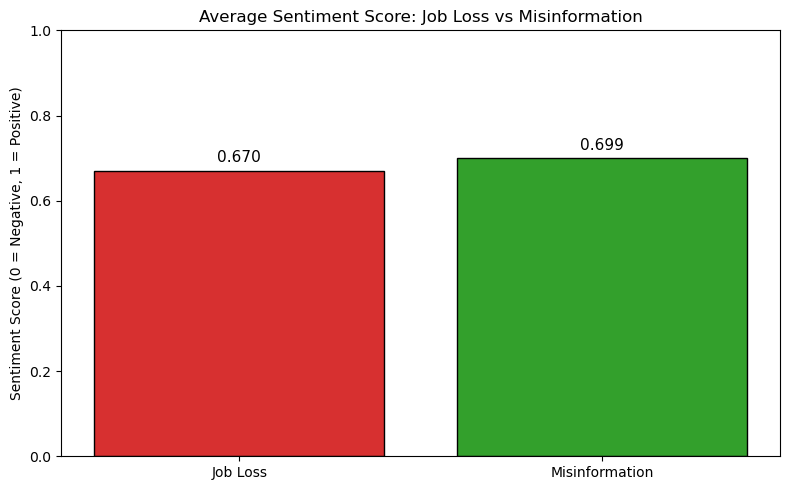

In [188]:
# Sentiment Score Comparison (e.g., "fake news" vs "job loss")
# Extract sentiment for job loss and misinformation mentions
job_loss_sentiment = df[df['job_loss_mention']][sentiment_col].mean()
misinfo_sentiment = df[df['misinformation_mention']][sentiment_col].mean()

# Plot comparison
plt.figure(figsize=(8, 5))
bars = plt.bar(['Job Loss', 'Misinformation'], [job_loss_sentiment, misinfo_sentiment],
               color=['#d73030', '#33a02c'], edgecolor='black')

plt.title("Average Sentiment Score: Job Loss vs Misinformation")
plt.ylabel("Sentiment Score (0 = Negative, 1 = Positive)")
plt.ylim(0, 1)

# Add values
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

sentiment_data = {
    'Q8_AI_helping_BC_community': {'Positive': 48.7, 'Neutral': 31.5, 'Negative': 19.8},
    'Q13_AI_impact_worries': {'Positive': 11.3, 'Neutral': 28.5, 'Negative': 60.2},
    'Q17_Advice_BC_Leaders': {'Positive': 34.5, 'Neutral': 38.9, 'Negative': 26.6}
}
plt.figure(figsize=(12, 8))
x = ['Q8 (Helping BC)', 'Q13 (Worries)', 'Q17 (Advice)']
pos = [sentiment_data[q]['Positive'] for q in sentiment_data]
neu = [sentiment_data[q]['Neutral'] for q in sentiment_data]
neg = [sentiment_data[q]['Negative'] for q in sentiment_data]
if not (pos and neu and neg):
    print("■ No sentiment data available.")
    raise ValueError("Empty sentiment data")
bar_width = 0.25
x_pos = range(len(x))
plt.bar([i - bar_width for i in x_pos], pos, width=bar_width, label='Positive', color=sns.color_palette("Set2")[0])
plt.bar(x_pos, neu, width=bar_width, label='Neutral', color=sns.color_palette("Set2")[1])
plt.bar([i + bar_width for i in x_pos], neg, width=bar_width, label='Negative', color=sns.color_palette("Set2")[2])
plt.title("Sentiment Distribution for Open-Ended Responses")
plt.xlabel("Question")
plt.ylabel("Percentage (%)")
plt.xticks(x_pos, x)
plt.legend()
plt.savefig("sentiment_distribution_bar.png", bbox_inches='tight')
plt.show()
print()
print(f"■ Sentiment Distribution: {sentiment_data}")

**Observation:**

1. Strong Optimism in Q8 (Helping BC)

Nearly half of respondents express positive views on AI’s benefits to the province — such as in healthcare, efficiency, and productivity.

2. High Anxiety in Q13 (Worries)

With 60% of responses being negative, this question reveals the deep unease people feel about AI — likely focused on ethics, privacy, bias, and job displacement.

3. Q17 (Advice) Shows Pragmatism

Sentiment is more evenly distributed, indicating thoughtful or cautious engagement when it comes to giving advice to leaders — not too idealistic, nor overly fearful.

In [191]:
# Convert sentiment column to numeric
sentiment_col = 'Q17_Advice_BC_Leaders_text_OE_sentiment_percentage'
if sentiment_col in df.columns:
    df[sentiment_col] = pd.to_numeric(df[sentiment_col], errors='coerce')

# Display non-null advice responses
print("Open-ended advice to leaders (non-null):")
advice_texts = df['Q17_Advice_BC_Leaders_text_OE'].dropna()
print(advice_texts.tolist()[:10])  # Show first 10 examples
print("--------------------")

# Describe sentiment distribution
print("Check sentiment of advice:")
print(df[sentiment_col].describe())
print("--------------------")

Open-ended advice to leaders (non-null):
['People need to survive', 'Expand the thinking and possibilities of artificial intellience', "Focus on ethical use and promotion of AI. It's here whether we like it or not so but we should take a long hard look about how we can use it in positive and constructive ways.", "Don't let it take jobs away ", "My ideal would be to disband the NDP, but as that's unlikely, use a hands off approach. ", 'Restrictions, and hard thinking about how it could destroy many things.', 'Please make strong regulations and watch environmental impacts ', 'Use it to benefit all people but especially our most vulnerable.', 'Take it slow. ', 'Hands off. ']
--------------------
Check sentiment of advice:
count    997.000000
mean       0.713045
std        0.182151
min        0.288424
25%        0.560119
50%        0.705587
75%        0.877080
max        0.999290
Name: Q17_Advice_BC_Leaders_text_OE_sentiment_percentage, dtype: float64
--------------------


In [192]:
# Compare mean sentiment in advice by AI experience
print("Compare sentiment by AI experience:")
sentiment_by_ai_exp = df.groupby('Q1_Experience_with_AI')[sentiment_col].mean().sort_values(ascending=False)
print(sentiment_by_ai_exp)
print("--------------------")

Compare sentiment by AI experience:
Q1_Experience_with_AI
Regular user – I use AI often for work or personal stuff.                  0.735705
Aware but not a user – I’ve heard about AI but haven’t used it myself.     0.717028
No experience – I haven’t really used AI and don’t know much about it.     0.711189
Occasional user – I’ve tried a few tools like ChatGPT or an AI art app.    0.703087
Expert/Developer – I work with or build AI tools.                          0.643874
Name: Q17_Advice_BC_Leaders_text_OE_sentiment_percentage, dtype: float64
--------------------


In [193]:
# Identify most extreme sentiments
top_positive = df[df[sentiment_col] > 0.99]
top_negative = df[df[sentiment_col] < 0.2]

print(f"Number of highly positive advice entries (sentiment > 0.99): {len(top_positive)}")
print(f"Number of highly negative advice entries (sentiment < 0.2): {len(top_negative)}")

# Optional: Show a few examples
if len(top_positive) > 0:
    print("\nSample of highly positive advice:")
    print(top_positive['Q17_Advice_BC_Leaders_text_OE'].sample(min(5, len(top_positive))).tolist())

if len(top_negative) > 0:
    print("\nSample of highly negative advice:")
    print(top_negative['Q17_Advice_BC_Leaders_text_OE'].sample(min(5, len(top_negative))).tolist())

print("--------------------")

Number of highly positive advice entries (sentiment > 0.99): 41
Number of highly negative advice entries (sentiment < 0.2): 0

Sample of highly positive advice:
['Annoying ', "End it by law. But we won't do that, because money has corrupted everything. We're fucked.", 'I have no words for this one.  We have no competent leaders to advise.  Yes angry with this survey for sure.  Very biased.', 'Study the impact prior to making decisions\n', 'I am too ignorant on the subject to know.']
--------------------


Possible region columns: ['Q1_Location_in_BC']

Average sentiment in advice by location:
Q1_Location_in_BC
Victoria                      0.724595
Prince George                 0.714116
Vancouver / Lower Mainland    0.713463
Kelowna                       0.684351
Name: Q17_Advice_BC_Leaders_text_OE_sentiment_percentage, dtype: float64


/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/417946384.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=geo_sentiment.index, y=geo_sentiment.values, palette='viridis', color="skyblue", edgecolor="black")


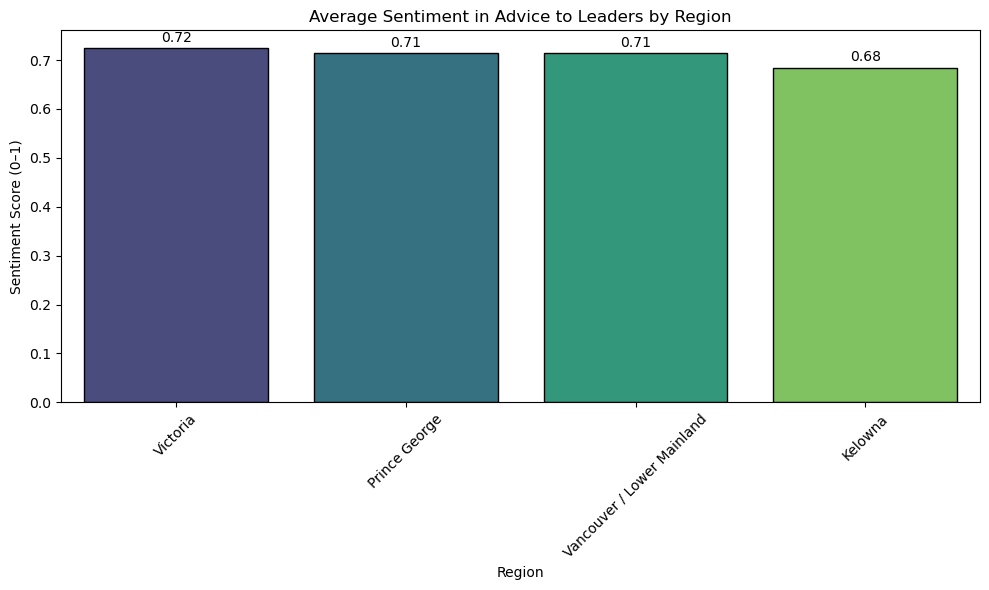

--------------------


In [194]:
# Find possible region/location columns
region_cols = [col for col in df.columns if 'region' in col.lower() or 'area' in col.lower() or 'location' in col.lower()]
print("Possible region columns:", region_cols)

# Use Q1_Location_in_BC for geographic comparison
location_col = 'Q1_Location_in_BC'
if location_col in df.columns:
    # Filter by major regions
    vancouver = df[df[location_col] == 'Vancouver / Lower Mainland']
    kelowna = df[df[location_col] == 'Kelowna']
    victoria = df[df[location_col] == 'Victoria']
    prince_george = df[df[location_col] == 'Prince George']

    # Compare average sentiment by location
    geo_sentiment = df.groupby(location_col)[sentiment_col].mean().sort_values(ascending=False)
    print("\nAverage sentiment in advice by location:")
    print(geo_sentiment)

    # Bar plot
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=geo_sentiment.index, y=geo_sentiment.values, palette='viridis', color="skyblue", edgecolor="black")

    # Add value labels on top of each bar
    for i, v in enumerate(geo_sentiment.values):
        bars.text(i, v + (max(geo_sentiment.values) * 0.01), f'{v:.2f}', 
              ha='center', va='bottom', fontsize=10, color='black')

    plt.title("Average Sentiment in Advice to Leaders by Region")
    plt.ylabel("Sentiment Score (0–1)")
    plt.xlabel("Region")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("Location column not found.")
print("--------------------")

## Word Count: 1 word

In [196]:
from collections import Counter

# Define a fast word-counting function
def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split())
    return word_counts

# Combine all responses into one large string
all_text = " ".join(df['Q17_Advice_BC_Leaders_text_OE'].dropna().tolist())

# Count word frequency
word_freq = count_words_fast(all_text)

# Convert to a sorted DataFrame for display
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(word_freq_df.head(20))

      Word  Frequency
0      and        503
1       to        446
2      the        439
3       it        394
4       ai        286
5       be        244
6       of        241
7      not        168
8      for        159
9       in        158
10      is        148
11       a        147
12    make        125
13      on        115
14    that        113
15     use        113
16  people        110
17    dont        104
18    with         97
19      do         79


## Word Count: 1 word (meaningful words only)

In [198]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sothengchheang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_df = word_freq_df[~word_freq_df['Word'].isin(stop_words)]

print(filtered_df.head(20))

           Word  Frequency
4            ai        286
12         make        125
15          use        113
16       people        110
17         dont        104
20         sure         76
25        don’t         67
32          let         55
40         need         44
41         keep         44
43         take         43
45  regulations         41
46          get         41
47        think         40
48     regulate         39
49     everyone         39
51         jobs         38
57       public         36
59         good         35
61         know         32


/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/379210802.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


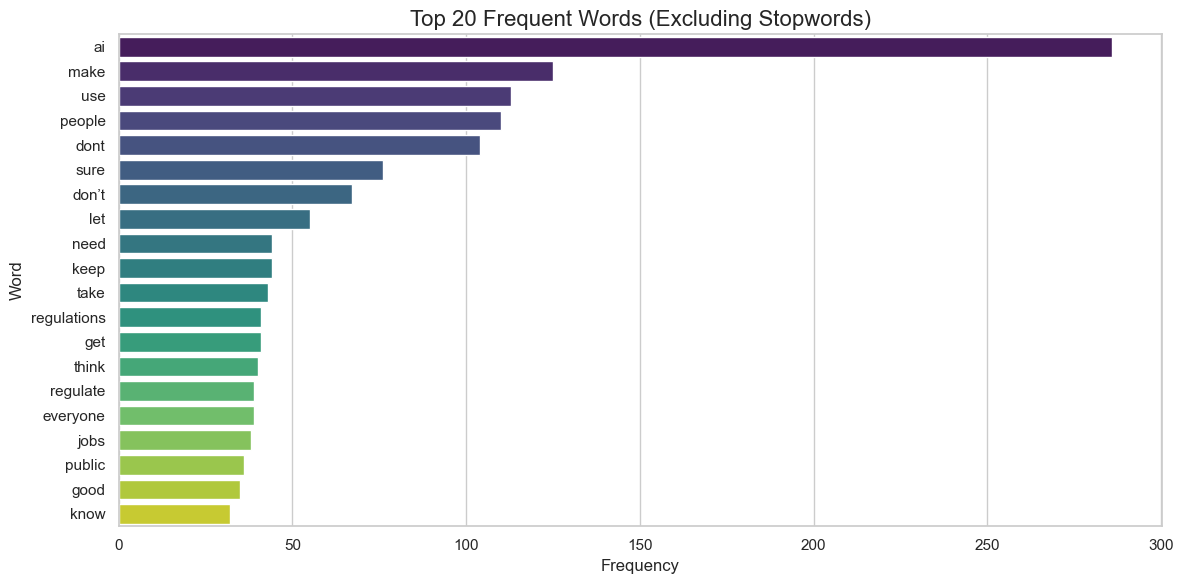

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Select top 20 words
top_words = filtered_df.head(20)

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')

# Add titles and labels
plt.title('Top 20 Frequent Words (Excluding Stopwords)', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()

## Word Count: bigrams

In [202]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text.strip()

In [203]:
all_text = " ".join(df['Q17_Advice_BC_Leaders_text_OE'].dropna().apply(clean_text).tolist())

words = all_text.split()
bigrams = list(zip(words, words[1:]))

# Count bigrams
bigram_counts = Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Frequency'])
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(bigram_df.head(50))

             Bigram  Frequency
0      (make, sure)         45
1        (make, it)         43
2         (use, it)         39
3         (of, the)         39
4          (of, ai)         37
5         (do, not)         35
6          (to, be)         33
7        (for, the)         32
8       (dont, let)         28
9          (it, is)         27
10        (let, it)         27
11         (ai, is)         26
12       (need, to)         25
13        (out, of)         25
14        (to, the)         24
15      (not, sure)         23
16    (the, people)         22
17     (should, be)         22
18        (to, use)         22
19         (ai, to)         21
20    (the, public)         21
21     (dont, know)         21
22       (will, be)         20
23        (in, the)         20
24        (i, dont)         20
25       (and, not)         18
26        (use, ai)         18
27        (on, the)         18
28         (it, to)         18
29   (be, cautious)         16
30     (listen, to)         16
31      

## Word Count: bigrams (meaningful bigrams only)

In [205]:
filtered_bigram_df = bigram_df[bigram_df['Bigram'].apply(lambda x: x[0] not in stop_words and x[1] not in stop_words)]

filtered_bigram_df['Bigram'] = filtered_bigram_df['Bigram'].apply(lambda x: f"{x[0]} {x[1]}")

print(filtered_bigram_df.head(30))

                  Bigram  Frequency
0              make sure         45
8               dont let         28
21             dont know         21
26                use ai         18
69              dont use         10
92               get rid          8
95              using ai          8
149           dont trust          6
159              ai dont          6
166   strong regulations          6
175            stay away          6
202              go slow          5
208      tread carefully          5
215            take away          5
244       tech companies          5
252           dont allow          4
276            good luck          4
277  government services          4
281            dont rush          4
283             job loss          4
289        powerful tool          4
291            long term          4
293           embrace ai          4
294            ai cannot          4
296         protect jobs          4
307               let ai          4
308        regulate dont    

/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/1871020060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bigram_df['Bigram'] = filtered_bigram_df['Bigram'].apply(lambda x: f"{x[0]} {x[1]}")


/var/folders/zl/vtrm8t7s45nb0ghmw9y_54p80000gn/T/ipykernel_32789/1618575139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams, x='Frequency', y='Bigram', palette='viridis')


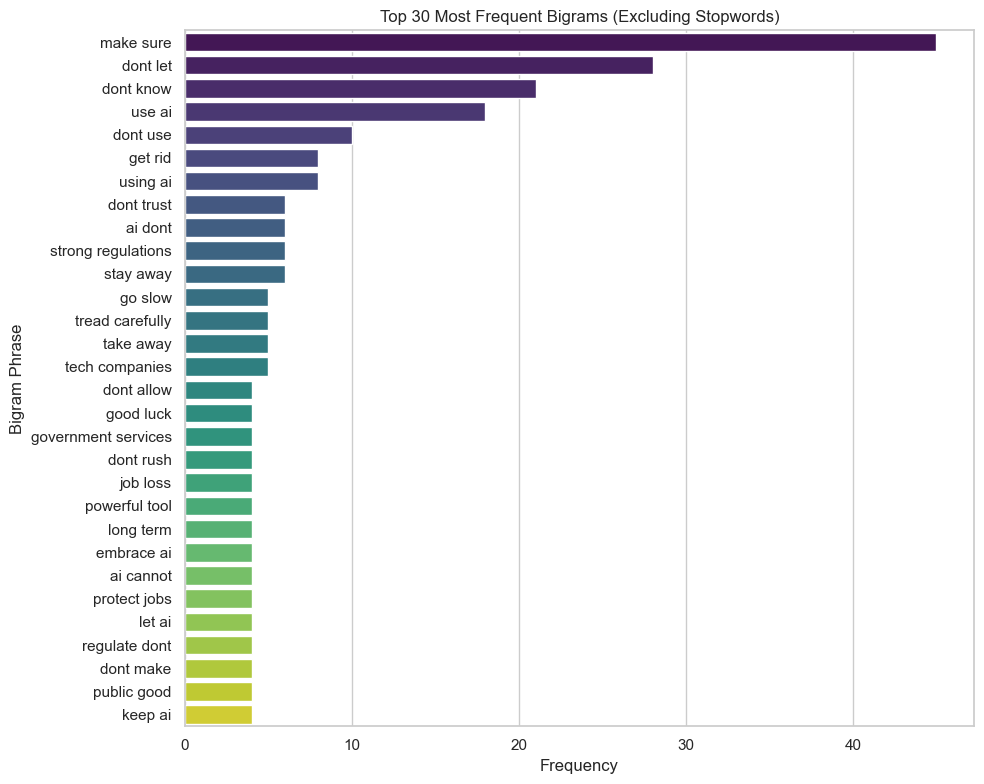

In [206]:

top_n = 30
top_bigrams = filtered_bigram_df.head(top_n)


plt.figure(figsize=(10, 8))
sns.barplot(data=top_bigrams, x='Frequency', y='Bigram', palette='viridis')

plt.title(f"Top {top_n} Most Frequent Bigrams (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Bigram Phrase")
plt.tight_layout()
plt.show()


**Observation:**

1. Caution & Control
Phrases like: don’t let, don’t use, don’t trust, stay away, go slow, tread carefully, regulate don’t
→ Reflect a deep-seated public caution around AI implementation and ethics.

2. Call for Governance
strong regulations, tech companies, government services, regulate don’t
→ Urge for government oversight and regulation over private sector AI deployment.

3. Employment Anxiety
job loss, protect jobs, replace human
→ Suggest worry about automation and workforce displacement.

4. Positive Adoption
use AI, using AI, let AI, embrace AI, powerful tool
→ Some respondents see the potential and want AI to be embraced responsibly.

5. Uncertainty
don’t know, don’t get
→ Indicates limited understanding or confusion about what AI can/can’t do.

## Word Count: Trigrams

In [209]:
all_text = " ".join(df['Q17_Advice_BC_Leaders_text_OE'].dropna().apply(clean_text).tolist())
words = all_text.split()


trigrams = list(zip(words, words[1:], words[2:]))

# Count trigrams
trigram_counts = Counter(trigrams)


trigram_df = pd.DataFrame(trigram_counts.items(), columns=['Trigram', 'Frequency'])
trigram_df = trigram_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: " ".join(x))


print(trigram_df.head(50))


               Trigram  Frequency
0          dont let it         16
1        make sure its         12
2          i dont know         12
3            use of ai         10
4          the good of          9
5           out of the          9
6          dont use it          8
7          needs to be          8
8          let it take          8
9           get rid of          8
10           use it to          8
11        make sure it          8
12         stay out of          8
13          use it for          8
14           to use it          7
15           use ai to          7
16       listen to the          7
17      make sure that          7
18  make it accessible          7
19            a lot of          7
20        for the good          7
21           i have no          7
22          the use of          7
23          we need to          7
24          how to use          6
25      stay away from          6
26           let it be          6
27     be very careful          6
28           o

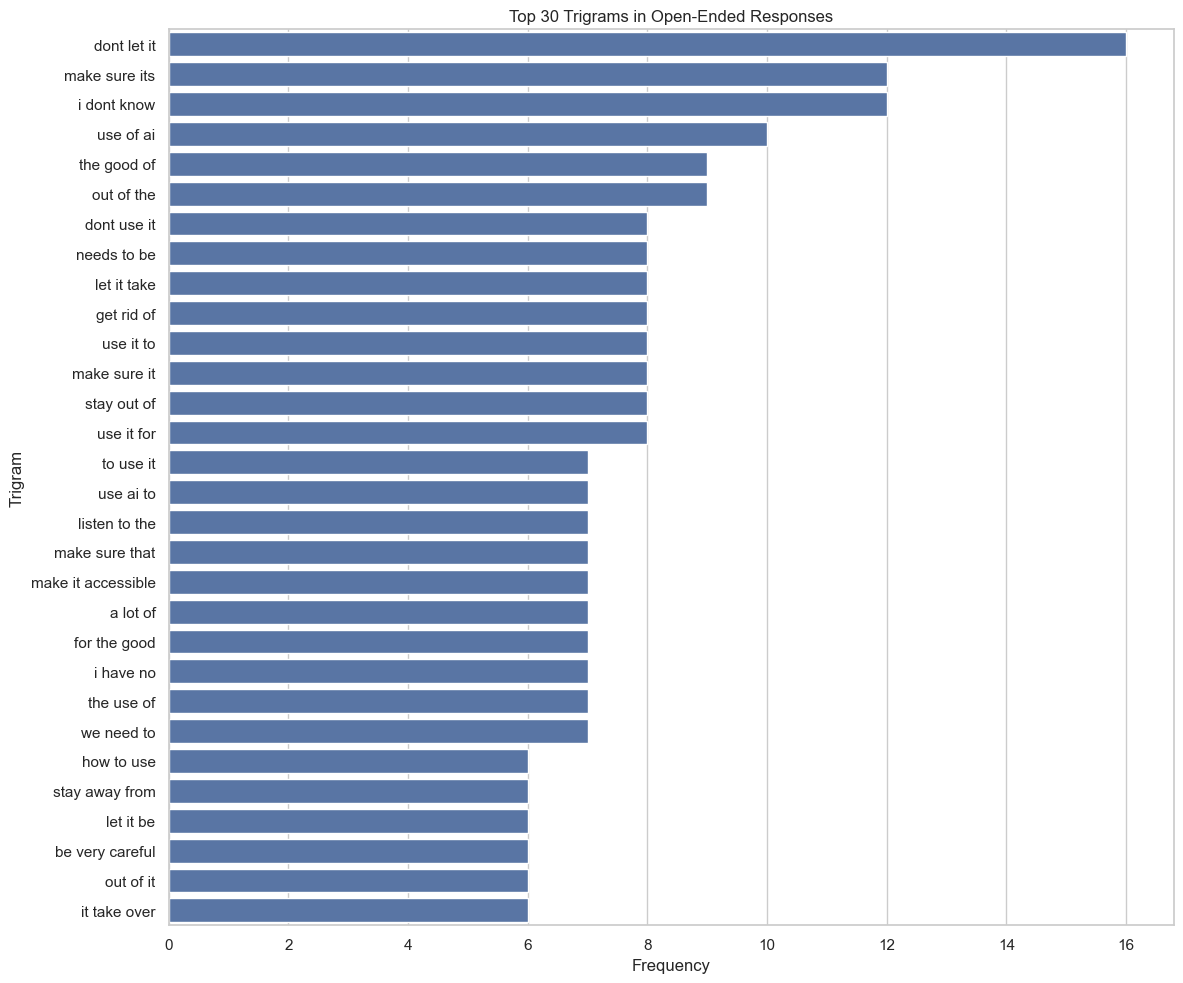

In [210]:
top_n = 30
top_trigrams = trigram_df.head(top_n)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=top_trigrams, x='Frequency', y='Trigram')
plt.title(f"Top {top_n} Trigrams in Open-Ended Responses")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.tight_layout()
plt.show()

**Observations:**

2.  Caution and Warnings
don’t let it, don’t use it, stay out of, be very careful, stay away from, let it take, take over

Reflect anxiety about AI autonomy, governance gaps, or AI overreach.

2. Recommendations and Regulation
make sure it’s, needs to be, make it accessible, we need to, be very careful

Suggest guidelines, accessibility, and strong governance are recurring demands.

3. Uncertainty and Limited Awareness
I don’t know, I have no, listen to the

Indicates respondents lack clear understanding of AI, and seek guidance or reassurance.

4. Constructive/Positive Outlook
for the good, use AI to, how to use, make it accessible

A portion of the public sees AI as potentially helpful, if used wisely.

## Trigrams by Age Group

In [213]:
print("■ Trigram Frequency by Age Group (Q17 Responses)")
print("=" * 60)

if 'Q17_Advice_BC_Leaders_text_OE' in df.columns and 'AgeRollup_Broad' in df.columns:
    age_groups = df['AgeRollup_Broad'].dropna().unique()
    
    for age_group in age_groups:
        print(f"\n Age Group: {age_group}")
        subset = df[(df['AgeRollup_Broad'] == age_group) & (df['Q17_Advice_BC_Leaders_text_OE'].notna())]
        texts = subset['Q17_Advice_BC_Leaders_text_OE'].apply(clean_text)
        all_text = " ".join(texts)
        words = all_text.split()
        
        
        trigrams = list(zip(words, words[1:], words[2:]))
        
        
        trigrams_filtered = [t for t in trigrams if all(w not in stop_words for w in t)]
        
        
        trigram_freq = Counter(trigrams_filtered)
        
        
        top_trigrams = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
        for trigram, count in top_trigrams:
            phrase = " ".join(trigram)
            print(f"   • {phrase}: {count}")


■ Trigram Frequency by Age Group (Q17 Responses)

 Age Group: 18-34
   • use dont let: 2
   • dont know dont: 2
   • long hard look: 1
   • constructive ways restrictions: 1
   • could destroy many: 1
   • destroy many things: 1
   • dont let children: 1
   • remove old fashioned: 1
   • old fashioned ways: 1
   • teach students destroy: 1

 Age Group: 55 Plus
   • careful make sure: 2
   • thats unlikely use: 1
   • trace ais delivery: 1
   • ais delivery back: 1
   • open honest make: 1
   • honest make sure: 1
   • consequences make sure: 1
   • make sure information: 1
   • sure information us: 1
   • information us accurate: 1

 Age Group: 35-54
   • take away jobs: 2
   • help people understand: 2
   • dont know keep: 2
   • take jobs away: 1
   • jobs away please: 1
   • away please make: 1
   • please make strong: 1
   • make strong regulations: 1
   • watch environmental impacts: 1
   • environmental impacts use: 1


/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


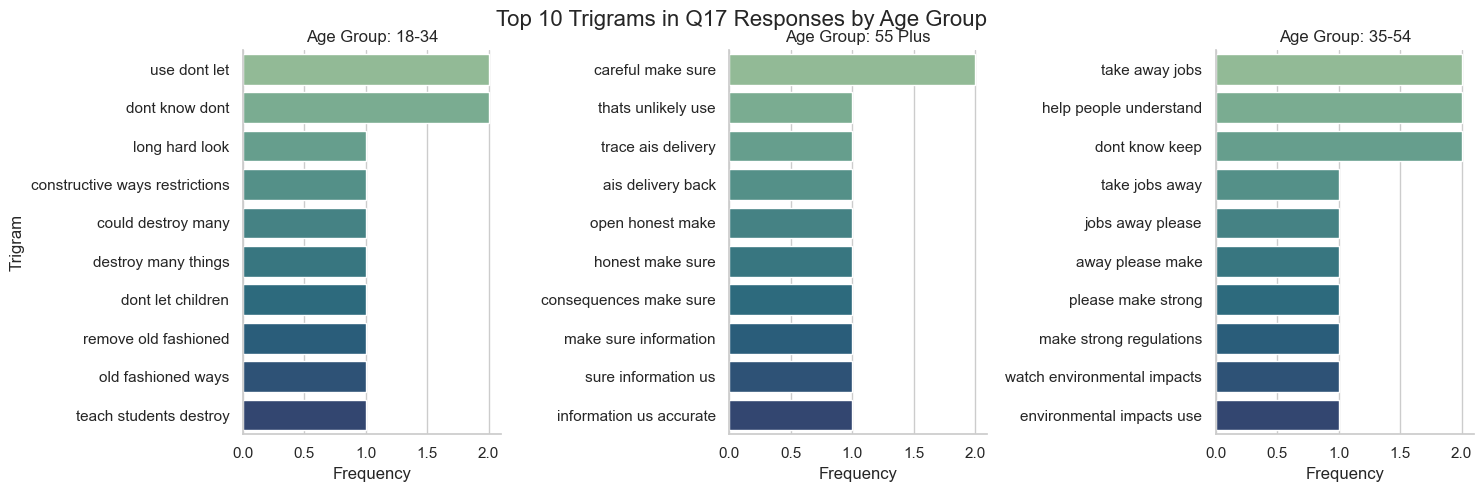

In [214]:
age_trigram_freq = []

if 'Q17_Advice_BC_Leaders_text_OE' in df.columns and 'AgeRollup_Broad' in df.columns:
    age_groups = df['AgeRollup_Broad'].dropna().unique()
    
    for age_group in age_groups:
        subset = df[(df['AgeRollup_Broad'] == age_group) & (df['Q17_Advice_BC_Leaders_text_OE'].notna())]
        texts = subset['Q17_Advice_BC_Leaders_text_OE'].apply(clean_text)
        all_text = " ".join(texts)
        words = all_text.split()
        
        trigrams = list(zip(words, words[1:], words[2:]))
        trigrams_filtered = [t for t in trigrams if all(w not in stop_words for w in t)]
        trigram_freq = Counter(trigrams_filtered)
        
        top_trigrams = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
        for trigram, count in top_trigrams:
            phrase = " ".join(trigram)
            age_trigram_freq.append({'AgeGroup': age_group, 'Trigram': phrase, 'Frequency': count})

trigram_df = pd.DataFrame(age_trigram_freq) 

g = sns.FacetGrid(trigram_df, col='AgeGroup', sharex=False, sharey=False, height=5)
g.map_dataframe(sns.barplot, x='Frequency', y='Trigram', palette='crest')
g.set_titles("Age Group: {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Trigrams in Q17 Responses by Age Group", fontsize=16)
plt.show()

Age Group	Dominant Concern	Tone	Unique Focus
18–34	Misuse & education	Cautious, skeptical	Youth, long-term impacts
55+	Accuracy & trust	Measured, verifying	Transparency, ethical delivery
35–54	Jobs & regulations	Protective, assertive	Employment, environment